<a href="https://colab.research.google.com/github/Alonso-Lopez-1/CS178_Final_Project/blob/main/CS178_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import warnings

from typing import List, Tuple

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

state = 5

In [11]:
fmnist_X, fmnist_y = fetch_openml(name='Fashion-MNIST', as_frame=False, return_X_y=True)
fmnist_y = fmnist_y.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
X_train, X_temp, y_train, y_temp = train_test_split(fmnist_X, fmnist_y, test_size=0.2, random_state=state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=state)

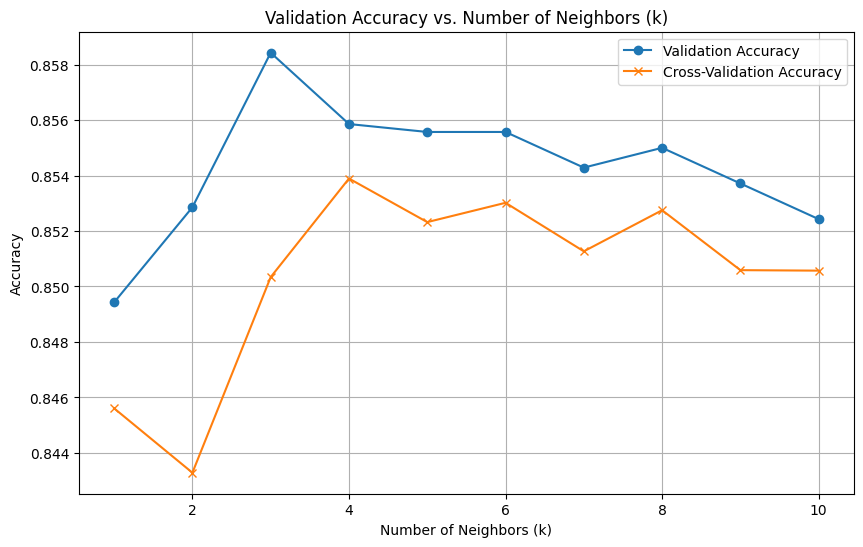

Final Test Accuracy: 0.851
Final Test Precision: 0.854747590142785
Final Test Recall: 0.8500597006490095


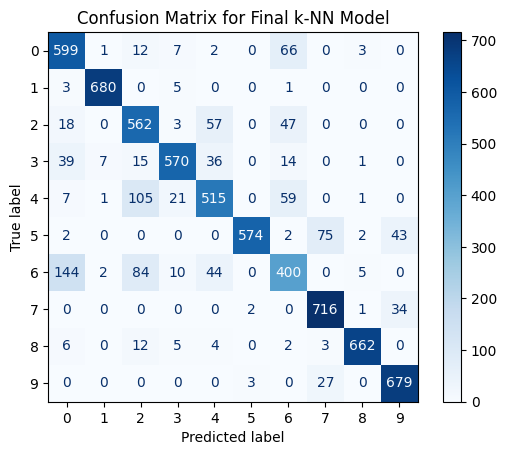

In [13]:
#------------------- K Nearest Neighbor -----------------------------
k_values = [i for i in range(1, 11)]
accuracy_scores = []
cross_val_scores = []
best_accuracy = 0
best_k = 1

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean') #Performing KNN for K = 0 to K = 11
    cv_scores = cross_val_score(knn, X_train.reshape(X_train.shape[0], -1), y_train, cv=5, scoring='accuracy') #Performing cross validation
    mean_cv_accuracy = np.mean(cv_scores) #Determining the mean accuracy
    cross_val_scores.append(mean_cv_accuracy)

    knn.fit(X_train.reshape(X_train.shape[0], -1), y_train) #Fit the model and evaluate on the validation set
    y_val_pred = knn.predict(X_val.reshape(X_val.shape[0], -1))
    accuracy = accuracy_score(y_val, y_val_pred)
    accuracy_scores.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', label='Validation Accuracy')
plt.plot(k_values, cross_val_scores, marker='x', label='Cross-Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

final_knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean') #Train final model with the best hyperparameters
final_knn.fit(X_train.reshape(X_train.shape[0], -1), y_train)

y_test_pred = final_knn.predict(X_test.reshape(X_test.shape[0], -1)) #Evaluate on the test set
final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='macro')
final_recall = recall_score(y_test, y_test_pred, average='macro')

print(f'Final Test Accuracy: {final_accuracy}')
print(f'Final Test Precision: {final_precision}')
print(f'Final Test Recall: {final_recall}')

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Final k-NN Model')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8474
              precision    recall  f1-score   support

           0       0.78      0.81      0.80       690
           1       0.96      0.96      0.96       689
           2       0.75      0.77      0.76       687
           3       0.84      0.83      0.83       682
           4       0.78      0.79      0.79       709
           5       0.94      0.92      0.93       698
           6       0.65      0.58      0.61       689
           7       0.90      0.92      0.91       753
           8       0.93      0.93      0.93       694
           9       0.93      0.94      0.93       709

    accuracy                           0.85      7000
   macro avg       0.85      0.85      0.85      7000
weighted avg       0.85      0.85      0.85      7000



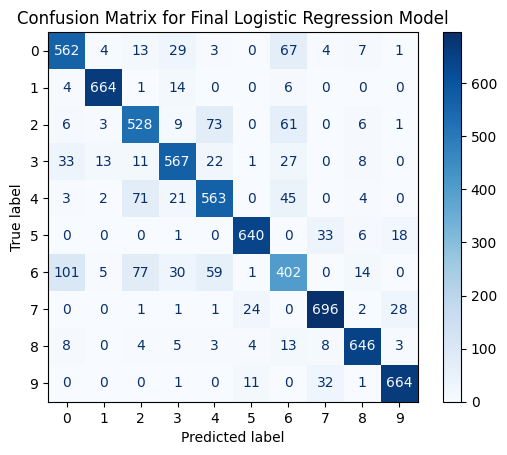

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
#------------------- Logistic Regression -----------------------------
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

c_values = np.logspace(-4, 4, 10)
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial') #Create the logistic regression model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_initial = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy_initial:.4f}')
print(classification_report(y_test, y_pred)) #Generate a detailed classification report

conf_matrix = confusion_matrix(y_test, y_pred) #Generating the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[i for i in range(10)])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Final Logistic Regression Model')
plt.show()

accuracy_list = []
for c in c_values:
    model = LogisticRegression(C=c, max_iter=1000, solver='lbfgs', multi_class='multinomial') #Creating the logistic regression model with different C values
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    #print(f'\nC={c:.4f}')
    #print(classification_report(y_test, y_pred))
    #conf_matrix = confusion_matrix(y_test, y_pred)
    #disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
    #disp.plot(cmap=plt.cm.Blues)
    #plt.title(f'Confusion Matrix for C={c:.4f}')
    #plt.show()

plt.figure(figsize=(8, 6)) #Accuracy vs. C values
plt.plot(c_values, accuracy_list, marker='o')
plt.xscale('log')
plt.xlabel('C (Regularization strength)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. C values in Logistic Regression')
plt.grid(True)
plt.show()


In [ ]:
#------------------- Feed-Forward Neural Network -----------------------------
warnings.filterwarnings('ignore')
seed = 5 #Fixing the random seed for reproducibility
np.random.seed(seed)
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed) #Splitting the data into training and testing sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_architecture(hidden_layers, hidden_nodes): #Function that evaluates the model with different architectures
    architecture = tuple([hidden_nodes] * hidden_layers)
    mlp = MLPClassifier(hidden_layer_sizes=architecture, activation='relu', solver='sgd', learning_rate_init=0.001, batch_size=256, max_iter=200, random_state=seed)
    mlp.fit(X_train_scaled, y_train)
    train_accuracy = mlp.score(X_train_scaled, y_train)
    test_accuracy = mlp.score(X_test_scaled, y_test)
    return train_accuracy, test_accuracy, mlp.loss_curve_

layer_configs = [1, 2, 3]
node_configs = [32, 64, 128]
results = []

for layers in layer_configs:
    for nodes in node_configs:
        train_acc, test_acc, loss_curve = evaluate_architecture(layers, nodes)
        results.append((layers, nodes, train_acc, test_acc, loss_curve))

plt.figure(figsize=(15, 10))
for layers in layer_configs:
    for nodes in node_configs:
        for result in results:
            if result[0] == layers and result[1] == nodes:
                plt.plot(result[4], label=f'{layers} Layers, {nodes} Nodes')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss Curves for Different Network Architectures')
plt.show()

train_accuracies = []
test_accuracies = []
labels = []

for result in results:
    train_accuracies.append(result[2])
    test_accuracies.append(result[3])
    labels.append(f'{result[0]} Layers, {result[1]} Nodes')

x = np.arange(len(labels))

plt.figure(figsize=(15, 6))
plt.bar(x - 0.2, train_accuracies, 0.4, label='Training Accuracy')
plt.bar(x + 0.2, test_accuracies, 0.4, label='Testing Accuracy')
plt.xticks(x, labels, rotation=45)
plt.xlabel('Network Architecture')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Accuracy for Different Network Architectures')
plt.show()

best_result = max(results, key=lambda x: x[3])  # Selecting based on test accuracy
best_layers, best_nodes = best_result[0], best_result[1]
best_architecture = tuple([best_nodes] * best_layers)
best_mlp = MLPClassifier(hidden_layer_sizes=best_architecture, activation='relu', solver='sgd', learning_rate_init=0.001, batch_size=256, max_iter=200, random_state=seed)
best_mlp.fit(X_train_scaled, y_train)
y_pred = best_mlp.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=best_mlp.classes_)

plt.figure(figsize=(10, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Best Architecture')
plt.show()

train_sizes = [50, 500, 2000, 5000, 10000, 20000, 40000]
train_errors = []
test_errors = []

for size in train_sizes:
    X_train_subset = X_train_scaled[:size]
    y_train_subset = y_train[:size]
    best_mlp.fit(X_train_subset, y_train_subset)
    train_errors.append(1 - best_mlp.score(X_train_subset, y_train_subset))
    test_errors.append(1 - best_mlp.score(X_test_scaled, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, test_errors, label='Testing Error', marker='x')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.title('Error Rates for Different Training Sizes')
plt.show()

learning_rates = [0.0005, 0.001, 0.005, 0.01] #Plotting learning curves for different learning rates
loss_curves = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='sgd', learning_rate_init=lr, batch_size=256, max_iter=100, random_state=seed)
    mlp.fit(X_train_scaled[:10000], y_train[:10000])
    loss_curves.append(mlp.loss_curve_)

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(loss_curves[i], label=f'lr={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss Curves for Different Learning Rates')
plt.show()


In [ ]:
#------------------- Convolutional Neural Network -----------------------------
seed = 5
np.random.seed(seed)
torch.manual_seed(seed)

class NumpyDataset(Dataset): #Dataset class that handles NumPy arrays
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index].reshape(28, 28).astype(np.float32) #Reshape to 2D image and convert to float32
        y = self.targets[index].astype(np.int64) #Convert labels to int64
        if self.transform:
            x = self.transform(x)
        return x, y

scaler = StandardScaler()
fmnist_X = scaler.fit_transform(fmnist_X)

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = NumpyDataset(X_train, y_train, transform=transform)
val_dataset = NumpyDataset(X_val, y_val, transform=transform)
test_dataset = NumpyDataset(X_test, y_test, transform=transform)

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

def initialize_model():
    model = CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return model, criterion, optimizer

def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

kf = KFold(n_splits=5, shuffle=True, random_state=seed)
cv_train_accuracies = []
cv_val_accuracies = []

for train_index, val_index in kf.split(train_dataset):
    train_subset = Subset(train_dataset, train_index)
    val_subset = Subset(train_dataset, val_index)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)

    model, criterion, optimizer = initialize_model()
    train(model, train_loader, criterion, optimizer, epochs=10)

    train_accuracy = evaluate(model, train_loader)
    val_accuracy = evaluate(model, val_loader)
    cv_train_accuracies.append(train_accuracy)
    cv_val_accuracies.append(val_accuracy)

    print(f'Fold train accuracy: {train_accuracy}, Fold validation accuracy: {val_accuracy}')

print(f'Mean cross-validation train accuracy: {np.mean(cv_train_accuracies)}')
print(f'Mean cross-validation validation accuracy: {np.mean(cv_val_accuracies)}')

model, criterion, optimizer = initialize_model()
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
train(model, train_loader, criterion, optimizer, epochs=10)
test_accuracy = evaluate(model, test_loader)
print(f'Test accuracy: {test_accuracy}')

train_sizes = [50, 500, 2000, 5000, 10000, 20000, 40000]
train_errors = []
val_errors = []

for size in train_sizes:
    subset_train_loader = DataLoader(random_split(train_dataset, [size, len(train_dataset) - size])[0], batch_size=batch_size, shuffle=True)
    model, criterion, optimizer = initialize_model()
    train(model, subset_train_loader, criterion, optimizer, epochs=10)
    train_errors.append(1 - evaluate(model, subset_train_loader))
    val_errors.append(1 - evaluate(model, val_loader))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, label='Training Error', marker='o')
plt.plot(train_sizes, val_errors, label='Validation Error', marker='x')
plt.xlabel('Number of Training Data Points')
plt.ylabel('Error Rate')
plt.legend()
plt.grid(True)
plt.title('Error Rates for Different Training Sizes')
plt.show()

learning_rates = [0.0005, 0.001, 0.005, 0.01]
loss_curves = []

for lr in learning_rates:
    model, criterion, optimizer = initialize_model()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
    losses = []
    for epoch in range(10):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        losses.append(epoch_loss)
    loss_curves.append(losses)

plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(loss_curves[i], label=f'lr={lr}')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Loss Curves for Different Learning Rates')
plt.show()

In [ ]:
#------------------- Convolutional Neural Network -----------------------------
seed = 5
np.random.seed(seed)
torch.manual_seed(seed)

class NumpyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        x = self.data[index].reshape(28, 28).astype(np.float32)  # Reshape to 2D image and convert to float32
        y = self.targets[index].astype(np.int64)  # Convert labels to int64
        if self.transform:
            x = self.transform(x)
        return x, y

scaler = StandardScaler()
fmnist_X = scaler.fit_transform(fmnist_X)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = NumpyDataset(X_train, y_train, transform=transform)
val_dataset = NumpyDataset(X_val, y_val, transform=transform)
test_dataset = NumpyDataset(X_test, y_test, transform=transform)

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#Defining different CNN architectures
class CNN1(nn.Module):
    def __init__(self):
        super(CNN1, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN2(nn.Module):
    def __init__(self):
        super(CNN2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class CNN3(nn.Module):
    def __init__(self):
        super(CNN3, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 128 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class CNN4(nn.Module):
    def __init__(self):
        super(CNN4, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 3 * 3, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 3 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

class CNN5(nn.Module):
    def __init__(self):
        super(CNN5, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 3 * 3, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 1, 28, 28)
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 3 * 3)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def initialize_model(model_class):
    model = model_class()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    return model, criterion, optimizer

def train(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)
        epoch_loss = running_loss / len(train_loader.dataset)
        print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = correct / total
    return accuracy

cnn_models = [CNN1, CNN2, CNN3, CNN4, CNN5]

for i, model_class in enumerate(cnn_models):
    print(f'\nEvaluating model {i+1}/{len(cnn_models)}')
    model, criterion, optimizer = initialize_model(model_class)
    train(model, train_loader, criterion, optimizer, epochs=10)
    test_accuracy = evaluate(model, test_loader)
    print(f'Model {i+1} test accuracy: {test_accuracy:.4f}')
